In [1]:
# Reference : https://app.dominodatalab.com/u/LeJit/ImbalancedData/view/ImbalancedLearning.ipynb
# https://blog.dominodatalab.com/imbalanced-datasets/

!pip install imblearn  
from imblearn.datasets import make_imbalance

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
sns.set()

Populating the interactive namespace from numpy and matplotlib


In [3]:
import os
os.chdir('C:\\Users\\S719789\\Documents')

In [4]:
lawmaker_df = pd.read_csv("enigma-lawmaker.csv")

In [5]:
lawmaker_df.head()

,cid,name,minvalue,maxvalue,avgvalue,year,chamber,origin,serialid
0,N00007017,Darrell Issa (R-Calif),330380031.0,597850005.0,464115018.0,2012,House,Center for Responsive Politics,1
1,N00004309,Herb Kohl (D-Wis),276478025.0,383347994.0,329913009.0,2012,Senate,Center for Responsive Politics,2
2,N00002097,Mark Warner (D-Va),96221316.0,418742000.0,257481658.0,2012,Senate,Center for Responsive Politics,3
3,N00000245,John Kerry (D-Mass),184659550.0,288525063.0,236592306.0,2012,Executive,Center for Responsive Politics,4
4,N00029127,Jared Polis (D-Colo),69791412.0,326099998.0,197945705.0,2012,House,Center for Responsive Politics,5


In [6]:
lawmaker_df = lawmaker_df[lawmaker_df.year == 2012]
lawmaker_df = lawmaker_df[["minvalue","maxvalue","avgvalue","chamber"]]

In [7]:
lawmaker_df.head()

,minvalue,maxvalue,avgvalue,chamber
0,330380031.0,597850005.0,464115018.0,House
1,276478025.0,383347994.0,329913009.0,Senate
2,96221316.0,418742000.0,257481658.0,Senate
3,184659550.0,288525063.0,236592306.0,Executive
4,69791412.0,326099998.0,197945705.0,House


In [8]:
lawmaker_df.chamber.value_counts()

House        516
Senate       113
Executive     12
Judicial       1
Name: chamber, dtype: int64

In [9]:
house_exec = lawmaker_df[(lawmaker_df.chamber == "House") | (lawmaker_df.chamber == "Senate")]

In [10]:
house_exec.head()

,minvalue,maxvalue,avgvalue,chamber
0,330380031.0,597850005.0,464115018.0,House
1,276478025.0,383347994.0,329913009.0,Senate
2,96221316.0,418742000.0,257481658.0,Senate
4,69791412.0,326099998.0,197945705.0,House
5,65151162.0,244051998.0,154601580.0,House


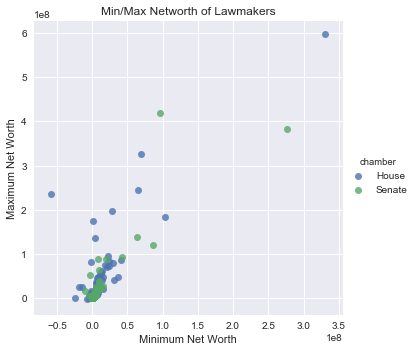

In [12]:
sns.lmplot("minvalue", "maxvalue", hue = "chamber", fit_reg = False, data = house_exec)
plt.xlabel("Minimum Net Worth")
plt.ylabel("Maximum Net Worth")
plt.title("Min/Max Networth of Lawmakers")
#plt.savefig("output/LawmakerScatterplot.png", format = "PNG") -- Save the plot

In [13]:
X, y = house_exec[["minvalue", "maxvalue"]], house_exec["chamber"]

In [40]:
X_resampled, y_resampled = make_imbalance(X,y, ratio = 0.05, min_c_ = "Senate", random_state = 249)



array(['House', 'House', 'House', 'House', 'House', 'House', 'House',
       'House', 'House', 'House', 'House', 'House', 'House', 'House',
       'House', 'House', 'House', 'House', 'House', 'House', 'House',
       'House', 'House', 'House', 'House', 'House', 'House', 'House',
       'House', 'House', 'House', 'House', 'House', 'House', 'House',
       'House', 'House', 'House', 'House', 'House', 'House', 'House',
       'House', 'House', 'House', 'House', 'House', 'House', 'House',
       'House', 'House', 'House', 'House', 'House', 'House', 'House',
       'House', 'House', 'House', 'House', 'House', 'House', 'House',
       'House', 'House', 'House', 'House', 'House', 'House', 'House',
       'House', 'House', 'House', 'House', 'House', 'House', 'House',
       'House', 'House', 'House', 'House', 'House', 'House', 'House',
       'House', 'House', 'House', 'House', 'House', 'House', 'House',
       'House', 'House', 'House', 'House', 'House', 'House', 'House',
       'House', 'Hou

In [31]:
df_ = pd.DataFrame()
df_["minvalue"] = X_resampled[:,0]
df_["maxvalue"] = X_resampled[:,1]
df_["chamber"] = y_resampled

In [32]:
df_.chamber.value_counts()

House     516
Senate     25
Name: chamber, dtype: int64

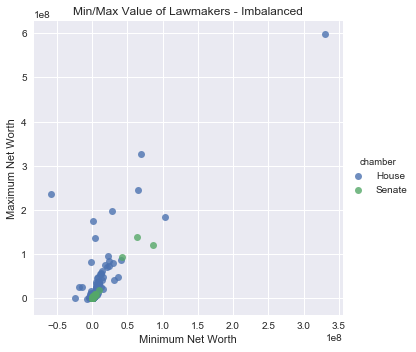

In [33]:
sns.lmplot("minvalue", "maxvalue", hue = "chamber", fit_reg = False, data = df_)
plt.xlabel("Minimum Net Worth")
plt.ylabel("Maximum Net Worth")
plt.title("Min/Max Value of Lawmakers - Imbalanced")
#plt.savefig("output/LawmakerImbalanced.png", format = "PNG")

In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
smote = SMOTE(kind = "regular")
X_sm, y_sm = smote.fit_sample(X_resampled, y_resampled)

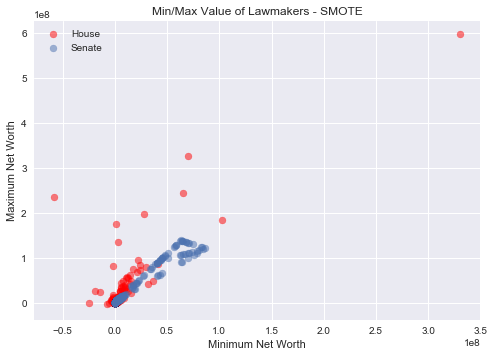

In [36]:
plt.scatter(X_sm[y_sm == "House",0], X_sm[y_sm == "House",1], label = "House", c= "r", alpha = 0.5)
plt.scatter(X_sm[y_sm == "Senate",0], X_sm[y_sm == "Senate",1], label = "Senate", alpha = 0.5)
plt.xlabel("Minimum Net Worth")
plt.ylabel("Maximum Net Worth")
plt.legend()
plt.title("Min/Max Value of Lawmakers - SMOTE")
#plt.savefig("output/LawmakerSMOTE.png", format = "PNG")

In [37]:
df_ = pd.DataFrame()
df_["minvalue"] = X_sm[:,0]
df_["maxvalue"] = X_sm[:,1]
df_["chamber"] = y_sm

In [38]:
df_.chamber.value_counts()

House     516
Senate    516
Name: chamber, dtype: int64